### Analyze_rotated_stable_points - evaluate bias in rotated DEMs using selected unchanged points

These points were picked on hopefully stable points in mostly flat places: docks, lawns, bare spots in middens. Also, the yurt roofs. Typically, 3 to 5 points were picked on most features.

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

from CoreBx_funcs import *

import matplotlib.pyplot as plt
%matplotlib inline

outdir = 'C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/'

In [2]:
# Coordinates for the whole-island box
# This must match the box defined in CoreBx_island_refac
r={'name': 'ncorebx_refac', 'e0': 378490., 'n0': 3855740., 'xlen': 36500.0, 'ylen': 1500.0, 'dxdy': 1.0, 'theta': 42.0}

# Convert origin to UTM
xu,yu = box2UTMh(0.,0.,r['e0'],r['n0'],r['theta'])
print(xu,yu)

# reverse the calc to find the origin (UTM =0,0) in box coordinates.
# First, just do the rotation to see where Box = 0,0 falls
xb0,yb0 = box2UTMh(xu,yu,0.,0.,-r['theta'])
print(xb0,yb0)
# Then put in negative values for the offset
xb,yb = box2UTMh(xu,yu,-xb0,-yb0,-r['theta'])
print(xb,yb)

[378490.] [3855740.]
[2861266.52915704] [2612113.98618544]
[array([0.])] [array([0.])]


C:\crs\src\CoreBx\CoreBx_funcs.py:635: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Th = np.array(((1., 0., x0),\


In [19]:
# Read in the list of stable points. Elevations were picked from the DEMs with Global Mapper. Elevations for Sep are from
# the old _crop version of the DEM.... .nc version read in below is from the newer _v3 version

# But in this case, all we really need are the X and Y values
df=pd.read_csv("C:\\crs\\proj\\2019_DorianOBX\\Santa_Cruz_Products\\stable_points\\All_points.csv",header = 0)

# convert UTM X, Y to rotated coords xrl, yrl
X = df["X"].values
Y = df["Y"].values
#TODO: why does this return a list of arrays?
xrl,yrl = box2UTMh(X,Y,-xb0,-yb0,-r['theta'])
# this fixes it...probably should fix box2UTMh
xrot = np.concatenate(xrl).ravel()
yrot = np.concatenate(yrl).ravel()
df

C:\crs\src\CoreBx\CoreBx_funcs.py:635: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Th = np.array(((1., 0., x0),\


,X,Y,lidar_gnd50,lidar all90,lidar_first50,Aug,Sep,Oct,Nov
0,387521.064,3864904.303,2.033,2.148,4.168,2.111,2.134,2.099,2.138
1,387524.918,3864904.854,2.110,2.197,4.278,2.219,2.221,2.187,2.268
2,387525.102,3864929.447,1.732,1.784,3.520,1.804,1.854,1.791,1.894
3,387524.001,3864924.308,1.693,1.763,3.468,1.802,1.859,1.830,1.880
4,387543.822,3864912.012,1.812,1.823,3.630,1.864,1.911,1.869,1.955
5,387604.204,3864943.579,1.810,1.839,3.620,1.879,1.871,1.904,1.947
6,387602.185,3864951.471,1.667,1.683,3.348,1.755,1.730,1.749,1.806
7,387604.204,3864943.579,1.810,1.839,3.620,1.879,1.871,1.904,1.947
8,390597.287,3868350.494,0.380,0.419,0.806,0.434,0.495,0.550,0.475
9,390597.287,3868350.494,0.380,0.419,0.806,0.434,0.495,0.550,0.475


In [4]:
# read in the multi-map .nc file

# Dates for DEMs
dates = ([\
         "2019-08-30",\
         "2019-09-12",\
         "2019-10-11",\
         "2019-11-26",\
         "2020-02-09",\
         "2020-04-09",\
         "2020-08-05",\
         "2020-08-09",\
         "2020-09-28",\
         "2021-05-30"])
titles = ([\
#         "Oct 6 2018 post-Florence"\
         "Aug 30 2019 pre-Dorian",\
         "Sep 12-13 2019 post-Dorian",\
         "Oct 11 2019 lidar merge",\
         "Nov 26 2019 post-Nor'easter",\
         "Feb 8-9 2020",\
         "May 8-9 2020",\
         "Aug 2 2020 pre-Isaias",\
         "Aug 5-9 2020 post-Isaias",\
         "Sep 28 2020 post-Teddy",\
         "May 30 2021"])



# ALERT - change this line to offset final results or not
#offset = np.array([-0.022233, 0.002373, 0.004543, 0.015317])
offset = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
# these offsets are the mean anomaly relative to the 10-map mean
offset = np.array([0.00168195,  0.02229009, -0.02397204, -0.01150765, -0.07320715, -0.02726184,
 -0.03547332, -0.02953579, -0.02719979,  0.00756222])
# these offsets are the mean anomaly relative to the first 4 map mean
offset = np.array([-0.00020638,  0.02215438, -0.021948,   -0.01124379, -0.07048248, -0.02704725,
 -0.03517789, -0.03183477, -0.03208453,  0.00711446])

dem_path ='C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/rotated_dems/'

fn = dem_path+r['name']+'.nc'
dsa = xr.open_dataset(fn)
dsaa = np.squeeze(dsa.to_array())
nmaps,ncross,nalong=np.shape(dsaa)
print('nmaps, ncross, nalong: ',nmaps,ncross,nalong)

# Correct for uniform offsets
for i in range(0,nmaps):
    dsaa[i,:,:] = dsaa[i,:,:] - offset[i]    

nmaps, ncross, nalong:  10 1500 36500


In [5]:
# Use rotated coordinates as indices into the maps to get elevations.
ix = xrot.astype(np.int64)
iy = yrot.astype(np.int64)

In [6]:
# ix = df["xr"].values.astype(np.int64)
# iy = df["yr"].values.astype(np.int64)
nx = len(ix)
zr = np.ones((nx,nmaps))
for j in range(0, nmaps):
    for i in range(0, nx):
        zr[i,j] = dsaa[j,iy[i],ix[i]].values

In [7]:
# Same thing, but average elevations over 9 adjacent grid cells
zra = np.ones((nx,nmaps))
for j in range(0, nmaps):
    for i in range(0, nx):
        zra[i,j]=0.0
        for ik in np.arange(-1,2):
            for jk in np.arange(-1,2):
                zra[i,j] = zra[i,j]+(1./9.)*dsaa[j,iy[i]+ik,ix[i]+jk].values

In [8]:
print("Number of NaNs in zr: ",np.sum(zr[zr==np.isnan]))
zr[np.abs(zr)>10]=np.nan
print("Number of NaNs in zra: ",np.sum(zra[zra==np.isnan]))
zra[np.abs(zra)>10]=np.nan

Number of NaNs in zr:  0.0
Number of NaNs in zra:  0.0


#### Calculate the anomoly for each of the ~58 points (value minus mean value, where mean is over all maps

In [9]:
anom = np.nan*np.ones_like(zr)
for i in range(0,nx):
    anom[i,:]=zr[i,:]-np.mean(zr[i,:])
anoma = np.nan*np.ones_like(zra)
for i in range(0,nx):
    anoma[i,:]=zra[i,:]-np.mean(zra[i,:])

# same calculation, but using mean of first four maps
anom4 = np.nan*np.ones_like(zr)
for i in range(0,nx):
    anom4[i,:]=zr[i,:]-np.mean(zr[i,0:3])
anoma4 = np.nan*np.ones_like(zra)
for i in range(0,nx):
    anoma4[i,:]=zra[i,:]-np.mean(zra[i,0:3])

In [10]:
mean_anom = np.mean(anom,0)
std_anom = np.std(anom,0)
print('mean_anom\n',mean_anom)
print('std_anom\n',std_anom)
mean_anoma = np.mean(anoma,0)
std_anoma = np.std(anoma,0)
print('mean_anoma\n',mean_anoma)
print('std_anoma\n',std_anoma)

mean_anom4 = np.mean(anom4,0)
std_anom4 = np.std(anom4,0)
print('mean_anom4\n',mean_anom4)
print('std_anom4\n',std_anom4)
mean_anoma4 = np.mean(anoma4,0)
std_anoma4 = np.std(anoma4,0)
print('mean_anoma4\n',mean_anoma4)
print('std_anoma4\n',std_anoma4)

mean_anom
 [-2.82278601e-08  2.35044731e-08 -1.81063166e-08  9.44677389e-09
 -7.98477317e-09 -4.61092535e-09  2.91275528e-08 -4.11609434e-08
  1.56321616e-08  2.23798572e-08]
std_anom
 [0.05069422 0.07656328 0.06191028 0.09396364 0.09730831 0.04592707
 0.04557733 0.04663276 0.06618049 0.03625956]
mean_anoma
 [ 1.47501138e-03 -2.77561362e-04 -2.43735216e-03 -6.77142778e-04
 -3.13797165e-03 -6.27891598e-04 -7.08691192e-04  1.88564952e-03
  4.47145546e-03  3.44943825e-05]
std_anoma
 [0.0496154  0.07694427 0.05873398 0.08887369 0.09517162 0.04262765
 0.04409449 0.04422249 0.06301558 0.03687584]
mean_anom4
 [-2.06179589e-08  3.11143743e-08 -1.04964154e-08  1.70566751e-08
 -3.74871980e-10  2.99897584e-09  3.67374540e-08 -3.35510422e-08
  2.32420627e-08  2.99897584e-08]
std_anom4
 [0.04176318 0.05521939 0.0644927  0.11451423 0.11221104 0.05821792
 0.06177231 0.05047203 0.08277917 0.04895302]
mean_anoma4
 [ 0.00188831  0.00013574 -0.00202405 -0.00026384 -0.00272467 -0.00021459
 -0.00029539  0.

### Plot anomalies for each map, relative to mean of first four maps

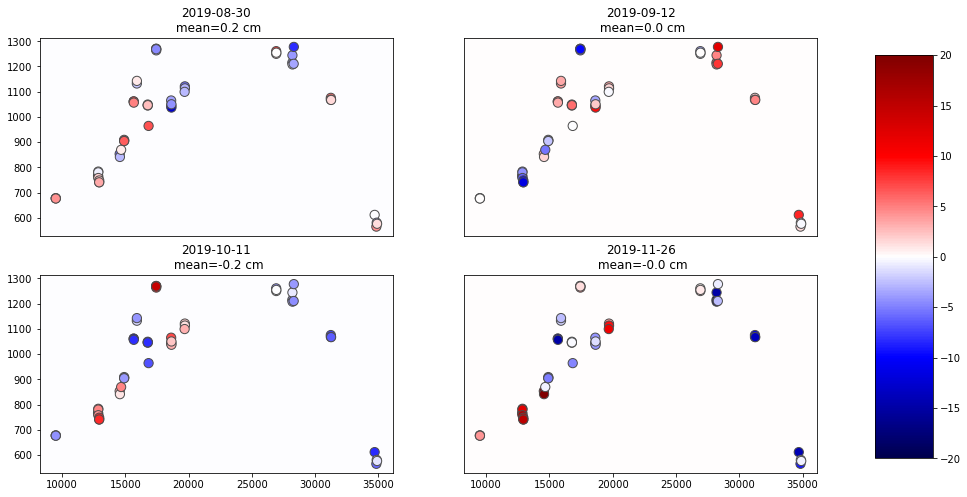

In [11]:
# array of edgcolors (dk. gray)
import matplotlib
ecol = 0.3*np.ones((len(xrot),3))
title_text = ['Aug','Sep','Oct','Nov']

cmap = matplotlib.cm.get_cmap('seismic')
vmin = -20
vmax = 20
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,8))
for imap, ax in enumerate(axes.flat):
    im = ax.scatter(xrot,yrot,85,100*anoma4[:,imap],cmap='seismic',edgecolors=ecol,vmin=vmin, vmax=vmax)
    ax.title.set_text(dates[imap]+'\n mean={:.1f} cm'.format(100*mean_anoma4[imap]))
    # set background color
    rgba = cmap(100*mean_anom4[imap]/(vmax-vmin)+0.5)
    ax.set_facecolor(rgba)
    if(imap<2):
        ax.set_xticks([])
    if(imap==1) or (imap==3):
        ax.set_yticks([])
      
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig(outdir+'anomaly4_scatter.svg')

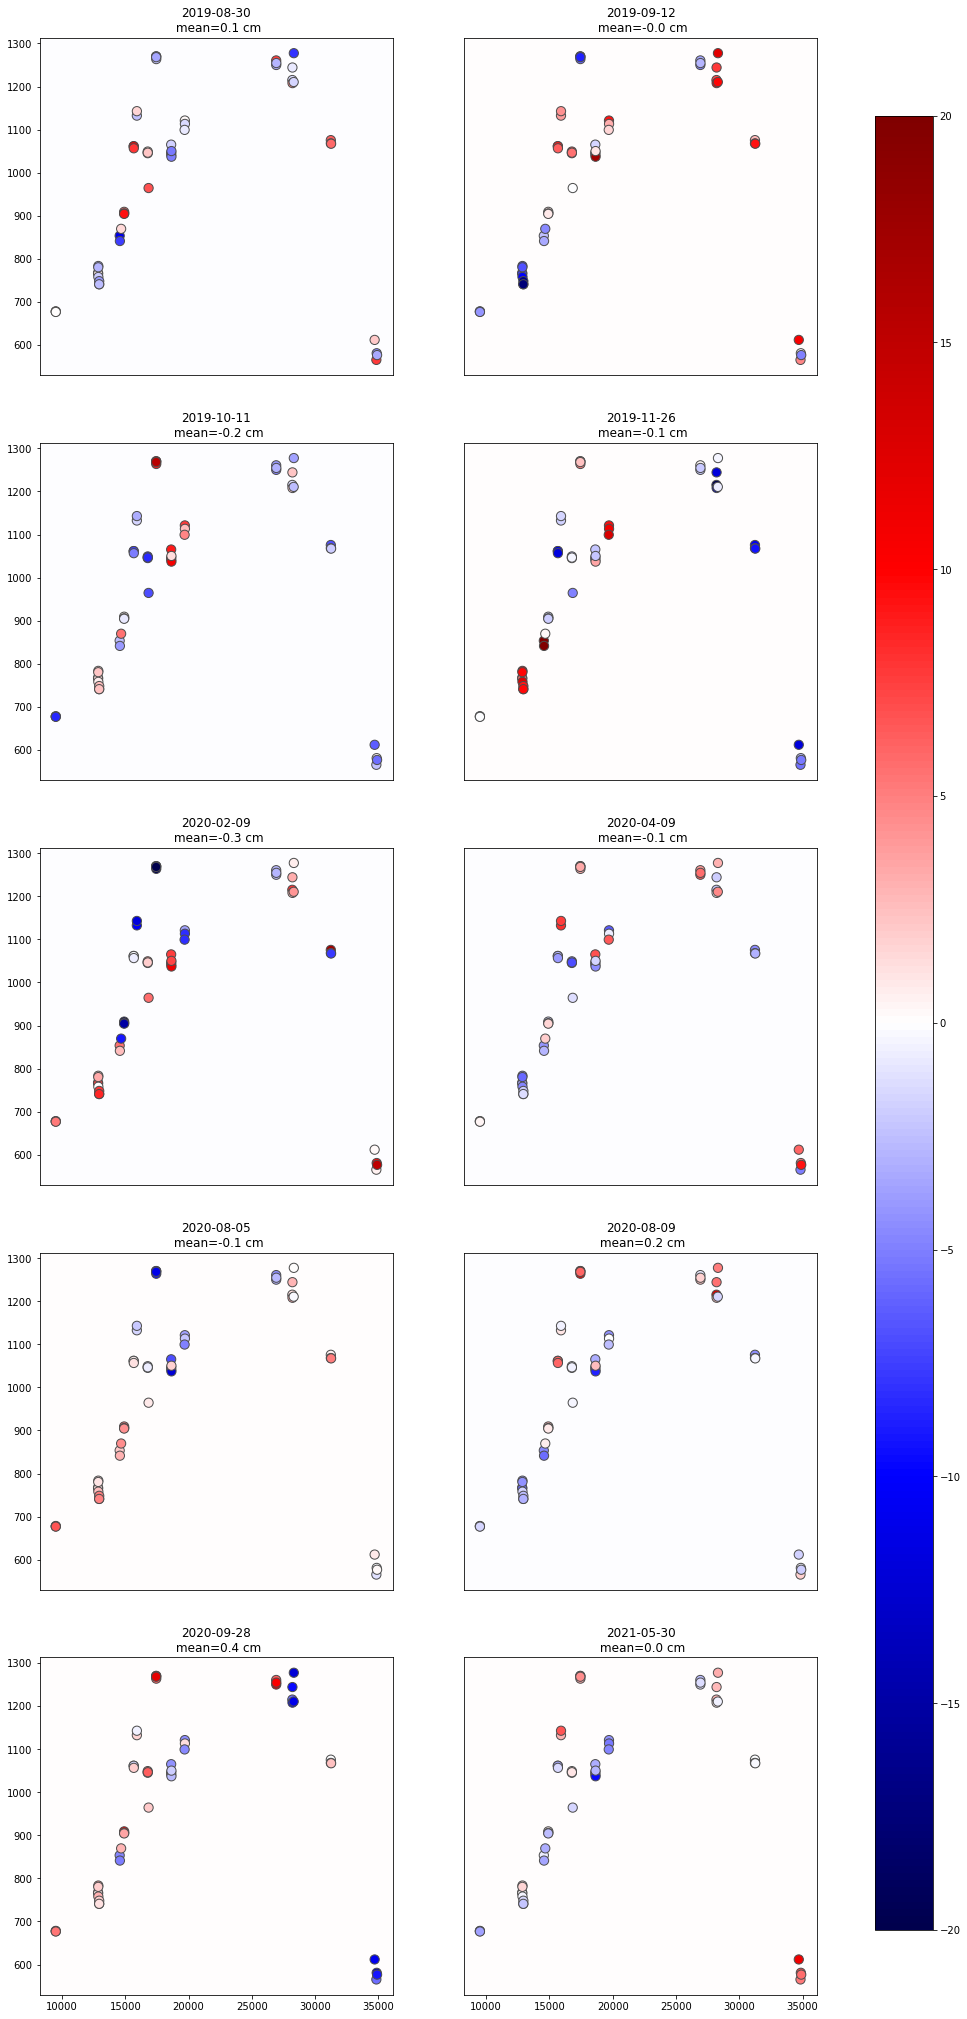

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(16,36))
for imap, ax in enumerate(axes.flat):
    im = ax.scatter(xrot,yrot,85,100*anoma[:,imap],cmap='seismic',edgecolors=ecol,vmin=vmin, vmax=vmax)
    ax.title.set_text(dates[imap]+'\n mean={:.1f} cm'.format(100*mean_anoma[imap]))
    # set background color
    rgba = cmap(100*mean_anom[imap]/(vmax-vmin)+0.5)
    ax.set_facecolor(rgba)
    if(imap<8):
        ax.set_xticks([])
    if imap % 2 == 0:
        pass
    else:
        ax.set_yticks([])
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig(outdir+'anomaly10_scatter.svg')

In [13]:
title_text[0]

'Aug'

In [14]:
mean_anom = np.mean(anom,0)
std_anom = np.std(anom,0)
print(mean_anom)
print(std_anom)
mean_anoma = np.mean(anoma,0)
std_anoma = np.std(anoma,0)
print(mean_anoma)
print(std_anoma)

[-2.82278601e-08  2.35044731e-08 -1.81063166e-08  9.44677389e-09
 -7.98477317e-09 -4.61092535e-09  2.91275528e-08 -4.11609434e-08
  1.56321616e-08  2.23798572e-08]
[0.05069422 0.07656328 0.06191028 0.09396364 0.09730831 0.04592707
 0.04557733 0.04663276 0.06618049 0.03625956]
[ 1.47501138e-03 -2.77561362e-04 -2.43735216e-03 -6.77142778e-04
 -3.13797165e-03 -6.27891598e-04 -7.08691192e-04  1.88564952e-03
  4.47145546e-03  3.44943825e-05]
[0.0496154  0.07694427 0.05873398 0.08887369 0.09517162 0.04262765
 0.04409449 0.04422249 0.06301558 0.03687584]


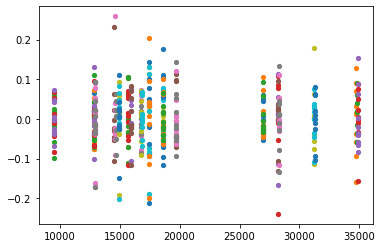

In [15]:
ixa = np.tile(ix,(nmaps,1)).T
for i in range(0,nx):
    #plt.scatter(ixa[i,:],anom[i,:],s=18,c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
    plt.scatter(ixa[i,:],anom[i,:],s=18)


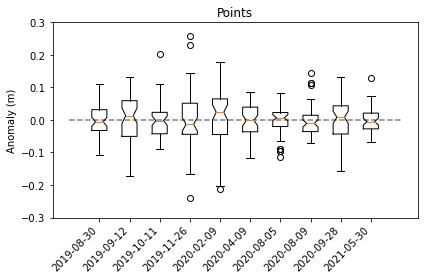

In [16]:
fig,ax = plt.subplots(1,1)
ax.plot([0,11],[0,0],'--',c='gray')
_ = ax.boxplot(anom,notch=True)
_ = ax.set_xticklabels(dates,rotation=45,ha='right')
ax.set_ylim((-.3,.3))
ax.set_ylabel('Anomaly (m)')
ax.set_title('Points relative to 10-map mean')
plt.tight_layout()
fig.savefig(outdir+'anom10_boxplot.svg')

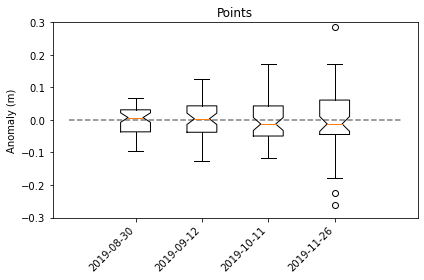

In [17]:
fig,ax = plt.subplots(1,1)
ax.plot([0,5],[0,0],'--',c='gray')
_ = ax.boxplot(anom4[:,0:4],notch=True)
_ = ax.set_xticklabels(dates[0:4],rotation=45,ha='right')
ax.set_ylim((-.3,.3))
ax.set_ylabel('Anomaly (m)')
ax.set_title('Points, relative to four-map mean')
plt.tight_layout()
fig.savefig(outdir+'anom4_boxplot.svg')

Text(0.5, 1.0, '3x3 regions')

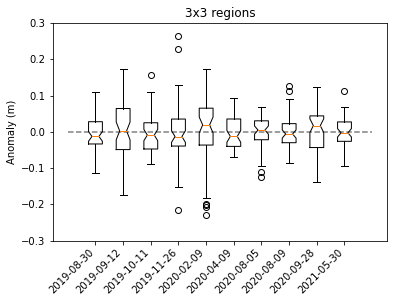

In [18]:
fig,ax = plt.subplots(1,1)
ax.plot([0,11],[0,0],'--',c='gray')
_ = ax.boxplot(anoma,notch=True)
_ = ax.set_xticklabels(dates,rotation=45,ha='right')
ax.set_ylim((-.3,.3))
ax.set_ylabel('Anomaly (m)')
ax.set_title('3x3 regions')